In [7]:
import pandas as pd

# Importar los datos
df = pd.read_csv("manufacturing_defect_dataset_OK .csv", sep=';', engine='python')

In [9]:
X = df.drop("DefectStatus", axis=1)
y = df["DefectStatus"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [11]:
from sklearn.ensemble import RandomForestClassifier

# Entrenar modelo Random Forest con valores por defecto
modelo_rf_base = RandomForestClassifier(random_state=42)
modelo_rf_base.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [88]:
from sklearn.metrics import classification_report, confusion_matrix

# Predicciones del modelo base
y_pred_rf_base = modelo_rf_base.predict(X_test)
y_proba = modelo_rf_base.predict_proba(X_test)[:, 1]

# Evaluación
print(classification_report(y_test, y_pred_rf_base))
print(confusion_matrix(y_test, y_pred_rf_base))
print("ROC-AUC:", roc_auc_score(y_test,y_proba))

              precision    recall  f1-score   support

           0       0.95      0.73      0.82       103
           1       0.95      0.99      0.97       545

    accuracy                           0.95       648
   macro avg       0.95      0.86      0.90       648
weighted avg       0.95      0.95      0.95       648

[[ 75  28]
 [  4 541]]
ROC-AUC: 0.8239957245925003


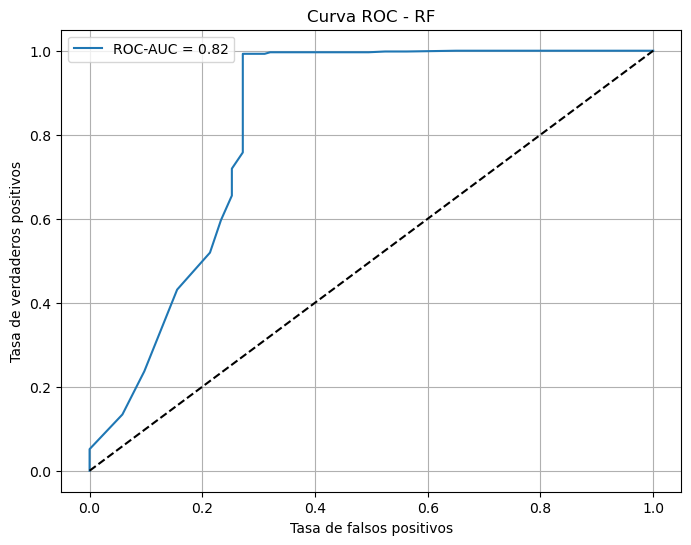

In [90]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC-AUC = {roc_auc_score(y_test, y_proba):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC - RF")
plt.legend()
plt.grid()
plt.show()

In [48]:
param_grid = {
    'n_estimators': [100, 200],           # número de árboles
    'max_depth': [None, 10, 20],          # profundidad máxima
    'min_samples_split': [2, 5],          # mínimo de muestras para dividir
    'min_samples_leaf': [1, 2],           # mínimo de muestras en una hoja
    'criterion': ['gini', 'entropy']      # función de impureza
}


In [50]:
from sklearn.model_selection import GridSearchCV

grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    verbose=1
)

grid_search_rf.fit(X_train, y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='recall', verbose=1)

In [51]:
mejor_rf = grid_search_rf.best_estimator_
mejor_rf.fit(X_train, y_train)  # este paso es opcional si ya lo hizo internamente


RandomForestClassifier(random_state=42)

In [86]:
y_pred_rf_ajustado = mejor_rf.predict(X_test)


print("Mejor modelo - Random Forest")
print(classification_report(y_test, y_pred_rf_ajustado))
print(confusion_matrix(y_test, y_pred_rf_ajustado))
print("Mejores hiperparámetros:", grid_search_rf.best_params_)
print("ROC-AUC:", roc_auc_score(y_test,y_prob_rf_balancead))

Mejor modelo - Random Forest
              precision    recall  f1-score   support

           0       0.95      0.73      0.82       103
           1       0.95      0.99      0.97       545

    accuracy                           0.95       648
   macro avg       0.95      0.86      0.90       648
weighted avg       0.95      0.95      0.95       648

[[ 75  28]
 [  4 541]]
Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
ROC-AUC: 0.842905495680057


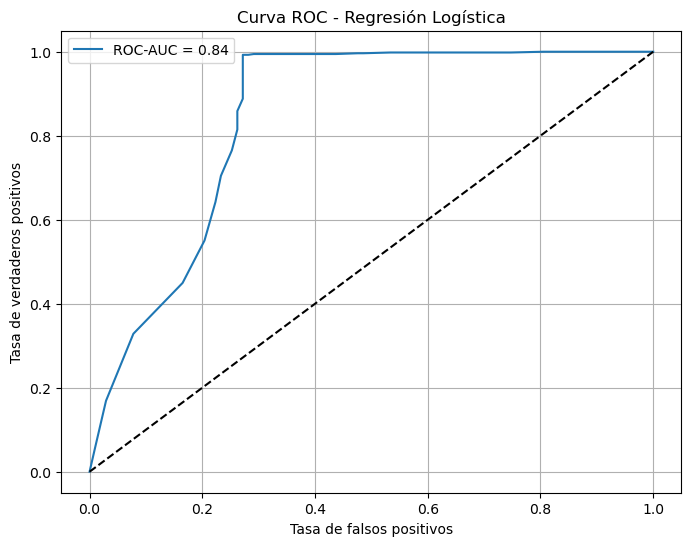

In [92]:
fpr, tpr, _ = roc_curve(y_test, y_prob_rf_balancead)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC-AUC = {roc_auc_score(y_test, y_prob_rf_balancead):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC - Regresión Logística")
plt.legend()
plt.grid()
plt.show()

<Figure size 600x500 with 0 Axes>

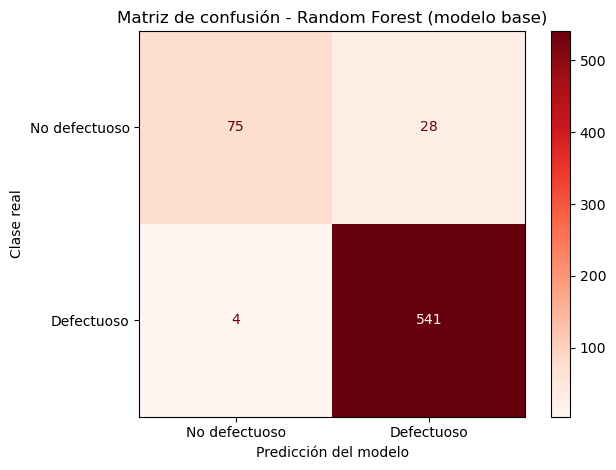

In [58]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

# Generar matriz de confusión
cm = confusion_matrix(y_test, y_pred_rf_base)

# Visualizarla con etiquetas personalizadas
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["No defectuoso", "Defectuoso"]
)

# Configuración visual
plt.figure(figsize=(6, 5))
disp.plot(cmap='Reds', values_format='d')
plt.title("Matriz de confusión - Random Forest (modelo base)")
plt.xlabel("Predicción del modelo")
plt.ylabel("Clase real")
plt.grid(False)
plt.tight_layout()
plt.show()


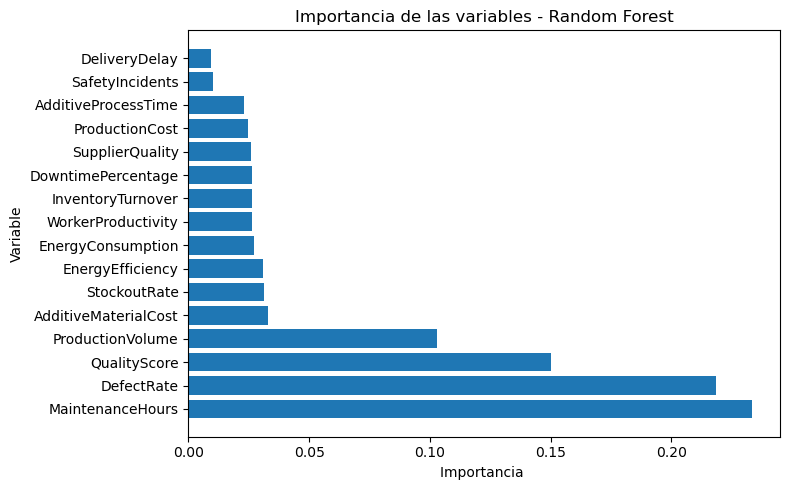

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Obtener importancias
importancias = modelo_rf_base.feature_importances_
nombres_vars = X.columns

# Ordenarlas
indices = np.argsort(importancias)

# Plot
plt.figure(figsize=(8, 5))
plt.barh(range(len(importancias)), importancias[indices], align='center')
plt.yticks(range(len(importancias)), [nombres_vars[i] for i in indices])
plt.xlabel("Importancia ")
plt.ylabel("Variable")
plt.title("Importancia de las variables - Random Forest")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

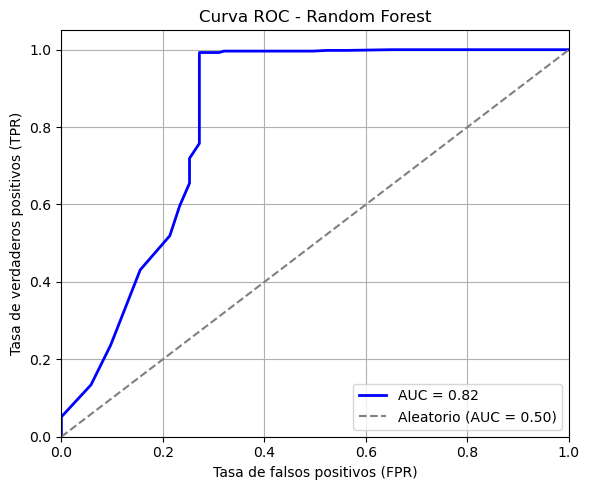

In [72]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Obtener probabilidades de clase 1 (defectuosos)
y_proba = modelo_rf_base.predict_proba(X_test)[:, 1]

# Calcular curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Graficar
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Aleatorio (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.title('Curva ROC - Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Entrenar modelo base con ajuste por desbalanceo
modelo_rf_balanced = RandomForestClassifier(class_weight='balanced', random_state=42)
modelo_rf_balanced.fit(X_train, y_train)

# Predicciones
y_pred_rf_balanced = modelo_rf_balanced.predict(X_test)
y_prob_rf_balancead = modelo_rf_balanced.predict_proba(X_test)[:, 1]
# Evaluación
from sklearn.metrics import classification_report, confusion_matrix

print("Random Forest con class_weight='balanced'")
print(classification_report(y_test, y_pred_rf_balanced))
print(confusion_matrix(y_test, y_pred_rf_balanced))
print("ROC-AUC:", roc_auc_score(y_test,y_prob_rf_balancead))

Random Forest con class_weight='balanced'
              precision    recall  f1-score   support

           0       0.95      0.73      0.82       103
           1       0.95      0.99      0.97       545

    accuracy                           0.95       648
   macro avg       0.95      0.86      0.90       648
weighted avg       0.95      0.95      0.95       648

[[ 75  28]
 [  4 541]]
ROC-AUC: 0.842905495680057


In [38]:
from sklearn.model_selection import GridSearchCV

# Definir rejilla 
param_grid = {
    'n_estimators': [300, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy']
}

# GridSearch con class_weight fijo
modelo_rf_grid = GridSearchCV(
    estimator=RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    verbose=1
)

modelo_rf_grid.fit(X_train, y_train)

# Evaluar el mejor modelo
mejor_rf_bal = modelo_rf_grid.best_estimator_
y_pred_mejor_rf_bal = mejor_rf_bal.predict(X_test)

print("Modelo ajustado con class_weight='balanced'")
print(classification_report(y_test, y_pred_mejor_rf_bal))
print(confusion_matrix(y_test, y_pred_mejor_rf_bal))
print("Mejores hiperparámetros:", modelo_rf_grid.best_params_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Modelo ajustado con class_weight='balanced'
              precision    recall  f1-score   support

           0       0.95      0.73      0.82       103
           1       0.95      0.99      0.97       545

    accuracy                           0.95       648
   macro avg       0.95      0.86      0.90       648
weighted avg       0.95      0.95      0.95       648

[[ 75  28]
 [  4 541]]
Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [34]:
# Separar por clase
df_clase0 = df[df["DefectStatus"] == 0]
df_clase1 = df[df["DefectStatus"] == 1]

# Número de muestras en clase minoritaria
n_min = min(len(df_clase0), len(df_clase1))

# Muestreo balanceado
df_balanceado = pd.concat([
    df_clase0.sample(n=n_min, random_state=42),
    df_clase1.sample(n=n_min, random_state=42)
])

# Dividir en X e y
X_bal = df_balanceado.drop("DefectStatus", axis=1)
y_bal = df_balanceado["DefectStatus"]

# División train-test
from sklearn.model_selection import train_test_split

X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(
    X_bal, y_bal, test_size=0.2, random_state=42, stratify=y_bal
)


In [36]:
modelo_rf_balanced_manual = RandomForestClassifier(random_state=42)
modelo_rf_balanced_manual.fit(X_train_bal, y_train_bal)

y_pred_manual = modelo_rf_balanced_manual.predict(X_test_bal)

print(classification_report(y_test_bal, y_pred_manual))
print(confusion_matrix(y_test_bal, y_pred_manual))


              precision    recall  f1-score   support

           0       0.95      0.75      0.84       104
           1       0.79      0.96      0.87       103

    accuracy                           0.86       207
   macro avg       0.87      0.86      0.85       207
weighted avg       0.87      0.86      0.85       207

[[78 26]
 [ 4 99]]


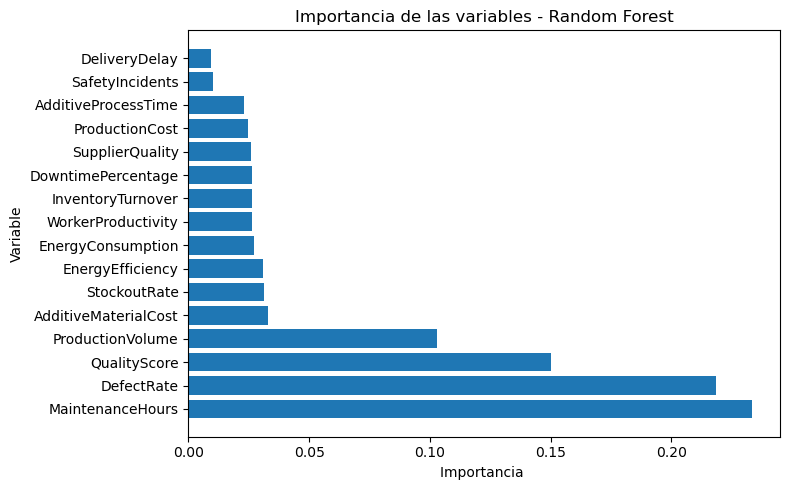

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Obtener importancias
importancias = modelo_rf_base.feature_importances_
nombres_vars = X.columns

# Ordenarlas
indices = np.argsort(importancias)

# Plot
plt.figure(figsize=(8, 5))
plt.barh(range(len(importancias)), importancias[indices], align='center')
plt.yticks(range(len(importancias)), [nombres_vars[i] for i in indices])
plt.xlabel("Importancia ")
plt.ylabel("Variable")
plt.title("Importancia de las variables - Random Forest")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


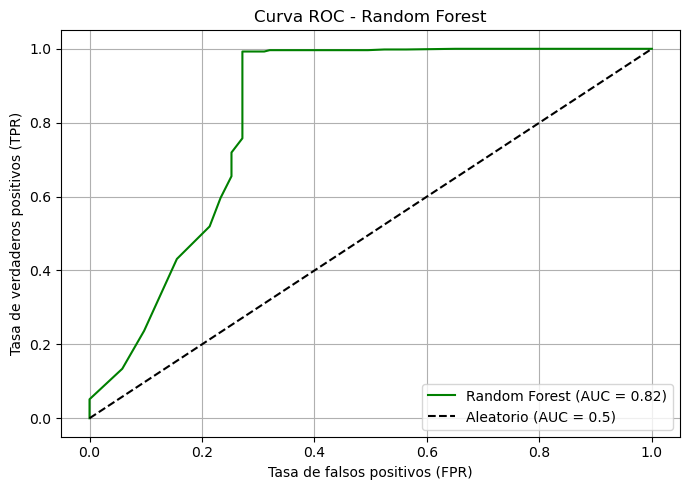

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Asegúrate de tener X e y definidos con tus datos reales

# División en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Entrenar el modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Obtener probabilidades de clase positiva
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Calcular curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Graficar
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc:.2f})", color='green')
plt.plot([0, 1], [0, 1], 'k--', label="Aleatorio (AUC = 0.5)")
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.title('Curva ROC - Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [74]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [76]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# 1. Separar características y variable objetivo
X = df.drop("DefectStatus", axis=1)
y = df["DefectStatus"]

# 2. Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# 4. Entrenar el modelo con los datos balanceados
modelo_rf_smote = RandomForestClassifier(random_state=42)
modelo_rf_smote.fit(X_train_sm, y_train_sm)

# 5. Evaluar en el conjunto de test original
y_pred_smote = modelo_rf_smote.predict(X_test)

# 6. Mostrar métricas
print("Evaluación del modelo con SMOTE:")
print(classification_report(y_test, y_pred_smote))
print(confusion_matrix(y_test, y_pred_smote))


Evaluación del modelo con SMOTE:
              precision    recall  f1-score   support

           0       0.89      0.72      0.80       103
           1       0.95      0.98      0.97       545

    accuracy                           0.94       648
   macro avg       0.92      0.85      0.88       648
weighted avg       0.94      0.94      0.94       648

[[ 74  29]
 [  9 536]]
